In [58]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import time
import os.path
import matplotlib.pyplot as plt
import attila_utils
import gem_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ar = gem_tools.read_active_reactions(groupdict={'m-control': ('all_control', 'MSBB'), 'm-AD-B2': ('SubtypeB2_AD', 'MSBB')})
gemsubsys = gem_tools.read_gem_excel()['SUBSYSTEM']
#myBinomialBayesMixedGLM(subsys, ar, control_group='m-control', AD_group='m-AD-B2', vcp_p=0.2, fe_p=2, fit_method='fit_vb', gemsubsys=gemsubsys)

In [47]:
subsysl = ['Sulfur metabolism', 'Arginine and proline metabolism', 'Fatty acid oxidation']#[:2]
fit_methods = ['fit_vb', 'fit_map']
subsys = subsysl[0]
def time_fit(subsys, fit_method):
    start = time.time()
    gem_tools.myBinomialBayesMixedGLM([subsys], ar, control_group='m-control', AD_group='m-AD-B2', vcp_p=0.2, fe_p=2, fit_method=fit_method, gemsubsys=gemsubsys)
    runtime = time.time() - start
    return(runtime)

fpath = '../../results/2023-02-22-bayes-logi-model-fitting/runtimes.csv'
if os.path.exists(fpath):
    runtimes = pd.read_csv(fpath, index_col=[0, 1])
else:
    ll = [[time_fit(subsys, fit_method) for subsys in subsysl] for fit_method in fit_methods]
    runtimes = pd.DataFrame(np.array(ll), columns=subsysl, index=fit_methods).stack().to_frame('runtime')
    runtimes['num_reactions'] = gemsubsys.value_counts().loc[df.index.get_level_values(1)].to_numpy()
    runtimes.to_csv(fpath)

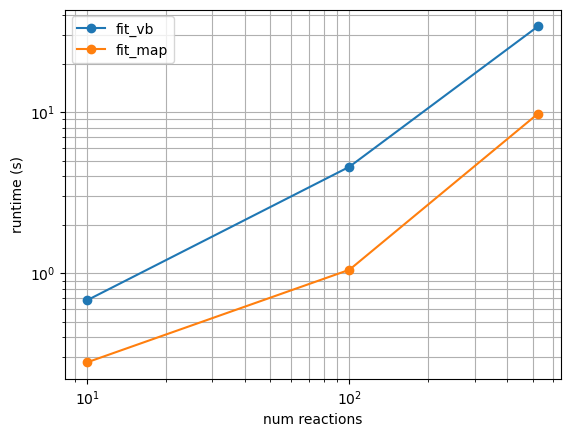

In [50]:
fig, ax = plt.subplots()
for fit_method in fit_methods:
    ax.plot('num_reactions', 'runtime', data=runtimes.xs(fit_method, level=0, axis=0), label=fit_method, marker='o')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('num reactions')
ax.set_ylabel('runtime (s)')
ax.grid(which='both')

In [3]:
%connect_info

{
  "shell_port": 49396,
  "iopub_port": 49397,
  "stdin_port": 49398,
  "control_port": 49400,
  "hb_port": 49399,
  "ip": "127.0.0.1",
  "key": "e7bc1dca-18d9c0c8c9e42c61eaca4426",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-72029c17-d4f9-4b29-8cc2-032366e993c5.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
